# The t-Distribution <hr style="border:2.5px solid #126782"></hr>


<b>Roan Gayl Ydrian B. Agustin</b>
<br>CpE - 2A

In [1]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load dataset
df = pd.read_csv("data set/transformer-voltage.csv",
                 delimiter=",",
                 index_col=["Sample"])
df

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6
6,119.6
7,119.7
8,119.7
9,119.7


In [4]:
# summary of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [5]:
# summary of statistics
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [7]:
# t-critical for two-tailed test
alpha = 0.05
n = df['Voltage'].count()

t_critical = stats.t.ppf(1- alpha/2, n- 1)
t_critical

np.float64(2.045229642132703)

In [9]:
# confidence interval
n = df['Voltage'].count()
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = n- 1,
    loc = mean,
    scale = std/np.sqrt(n)
)

print(f"CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

CI: [119.83, 120.75]


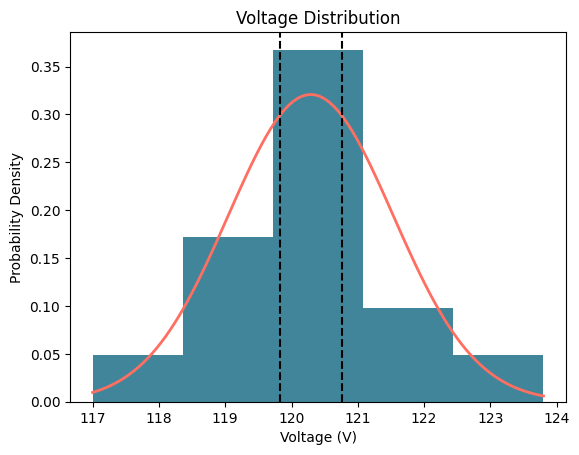

In [15]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# normal distribution plot
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p,
         linewidth=2,
         color='#FF6F61')

# histogram
plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=0.8,
         color='#126782')

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(x=ci_lower,
            color ='black',
            linestyle='--')
plt.axvline(x=ci_upper,
            color ='black',
            linestyle='--')
plt.show()

# Shoe Inventory

In [17]:
df = pd.read_csv("data set\shoe-inventory.csv",
                 delimiter=",")
df


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_41752\2006237182.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("data set\shoe-inventory.csv",


,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


In [18]:
# (rows, columns)
df.shape

(17, 13)

In [21]:
# mean of size 6
mean_size_6 = df.iloc[0,1:13].mean()
mean_size_6

np.float64(2.9166666666666665)

In [22]:
# standard deviation of size 6
std_size_6 = df.iloc[0,1:13].std()
std_size_6

np.float64(1.781640374554423)

In [25]:
# size 6 95% CI
n = df.shape[1]-1 # returns 13 in (17,13)
lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n- 1,
    loc = mean_size_6,
    scale = std_size_6/np.sqrt(n)
)
print(lower_6)
print(upper_6)  

1.7846663789548485
4.048666954378485


In [31]:
# 95% Confidence Level
mean = df.iloc[:17, 1:13].mean(axis=1) # all 16 sizes
std = df.iloc[:17, 1:13].std(axis=1)

df['ci_lower'], df['ci_upper'] = stats.t.interval(
    confidence = 0.95,
    df = n- 1,
    loc = mean,
    scale = std/np.sqrt(n)
)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [32]:
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ci_lower,ci_upper
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1.784666,4.048667
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0.445009,2.888324
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0.330237,3.003096
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1.638094,4.695240
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4.139885,8.026782
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8.279920,13.220080
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14.499984,23.166683
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24.946583,35.720084
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19.300389,26.199611
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14.573064,20.593603


In [39]:
# fill NAN with 0
df['ci_lower'] = df['ci_lower'].fillna(0)
df['ci_upper'] = df['ci_upper'].fillna(0)

In [40]:
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ci_lower,ci_upper
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1.784666,4.048667
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0.445009,2.888324
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0.330237,3.003096
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1.638094,4.695240
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4.139885,8.026782
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8.279920,13.220080
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14.499984,23.166683
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24.946583,35.720084
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19.300389,26.199611
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14.573064,20.593603


In [41]:
# convert to int and round to 0 
df['ci_lower'] = df['ci_lower'].astype(int).round()
df['ci_upper'] = df['ci_upper'].astype(int).round()

In [42]:
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ci_lower,ci_upper
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1,4
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0,2
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0,3
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1,4
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4,8
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8,13
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14,23
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24,35
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19,26
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14,20


In [43]:
# recommended no. of shoe pairs by size
df[['Size', 'ci_upper']]

,Size,ci_upper
0,6.0,4
1,6.5,2
2,7.0,3
3,7.5,4
4,8.0,8
5,8.5,13
6,9.0,23
7,9.5,35
8,10.0,26
9,10.5,20
